In [ ]:
! pip install opendatasets
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir batch
!mkdir stoch
!mkdir minibatch
# !mkdir 

library

In [ ]:
from PIL import Image, ImageDraw
import glob
from google.colab import files
import glob
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import opendatasets as od
import scipy.stats as stats
import pylab 
import seaborn as sb
from sklearn.model_selection import train_test_split
from scipy.stats import spearmanr

In [ ]:
!pip install --upgrade kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## how to import data set in to the google colab

https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

In [ ]:
!kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                      9KB  2022-10-06 08:55:25           3839        118  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset               11KB  2022-09-30 04:05:11           3168         89  1.0              
thedevastator/fast-food-restaurants-in-the-united-states        Fast Food Restaurants in the United States            4MB  2022-10-08 17:30:38           1084         28  1.0              
whenamancodes/students-performance-in-exams                 

In [ ]:
!kaggle datasets download -d noordeen/insurance-premium-prediction

  0% 0.00/13.4k [00:00<?, ?B/s]
100% 13.4k/13.4k [00:00<00:00, 12.1MB/s]


In [ ]:
! unzip insurance-premium-prediction.zip

Archive:  insurance-premium-prediction.zip
  inflating: insurance.csv           


In [ ]:
data=pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


### check nan data

In [ ]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

### preprocess

In [ ]:
data["sex"]=pd.get_dummies(data.sex)["female"]
data["smoker"]=pd.get_dummies(data.smoker)["yes"]
data=pd.concat([data,pd.get_dummies(data.region)],axis=1)
data.drop(["region","southwest"],axis=1,inplace=True)

In [ ]:
data.head()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast
0,19,1,27.9,0,1,16884.92,0,0,0
1,18,0,33.8,1,0,1725.55,0,0,1
2,28,0,33.0,3,0,4449.46,0,0,1
3,33,0,22.7,0,0,21984.47,0,1,0
4,32,0,28.9,0,0,3866.86,0,1,0


### pairplot

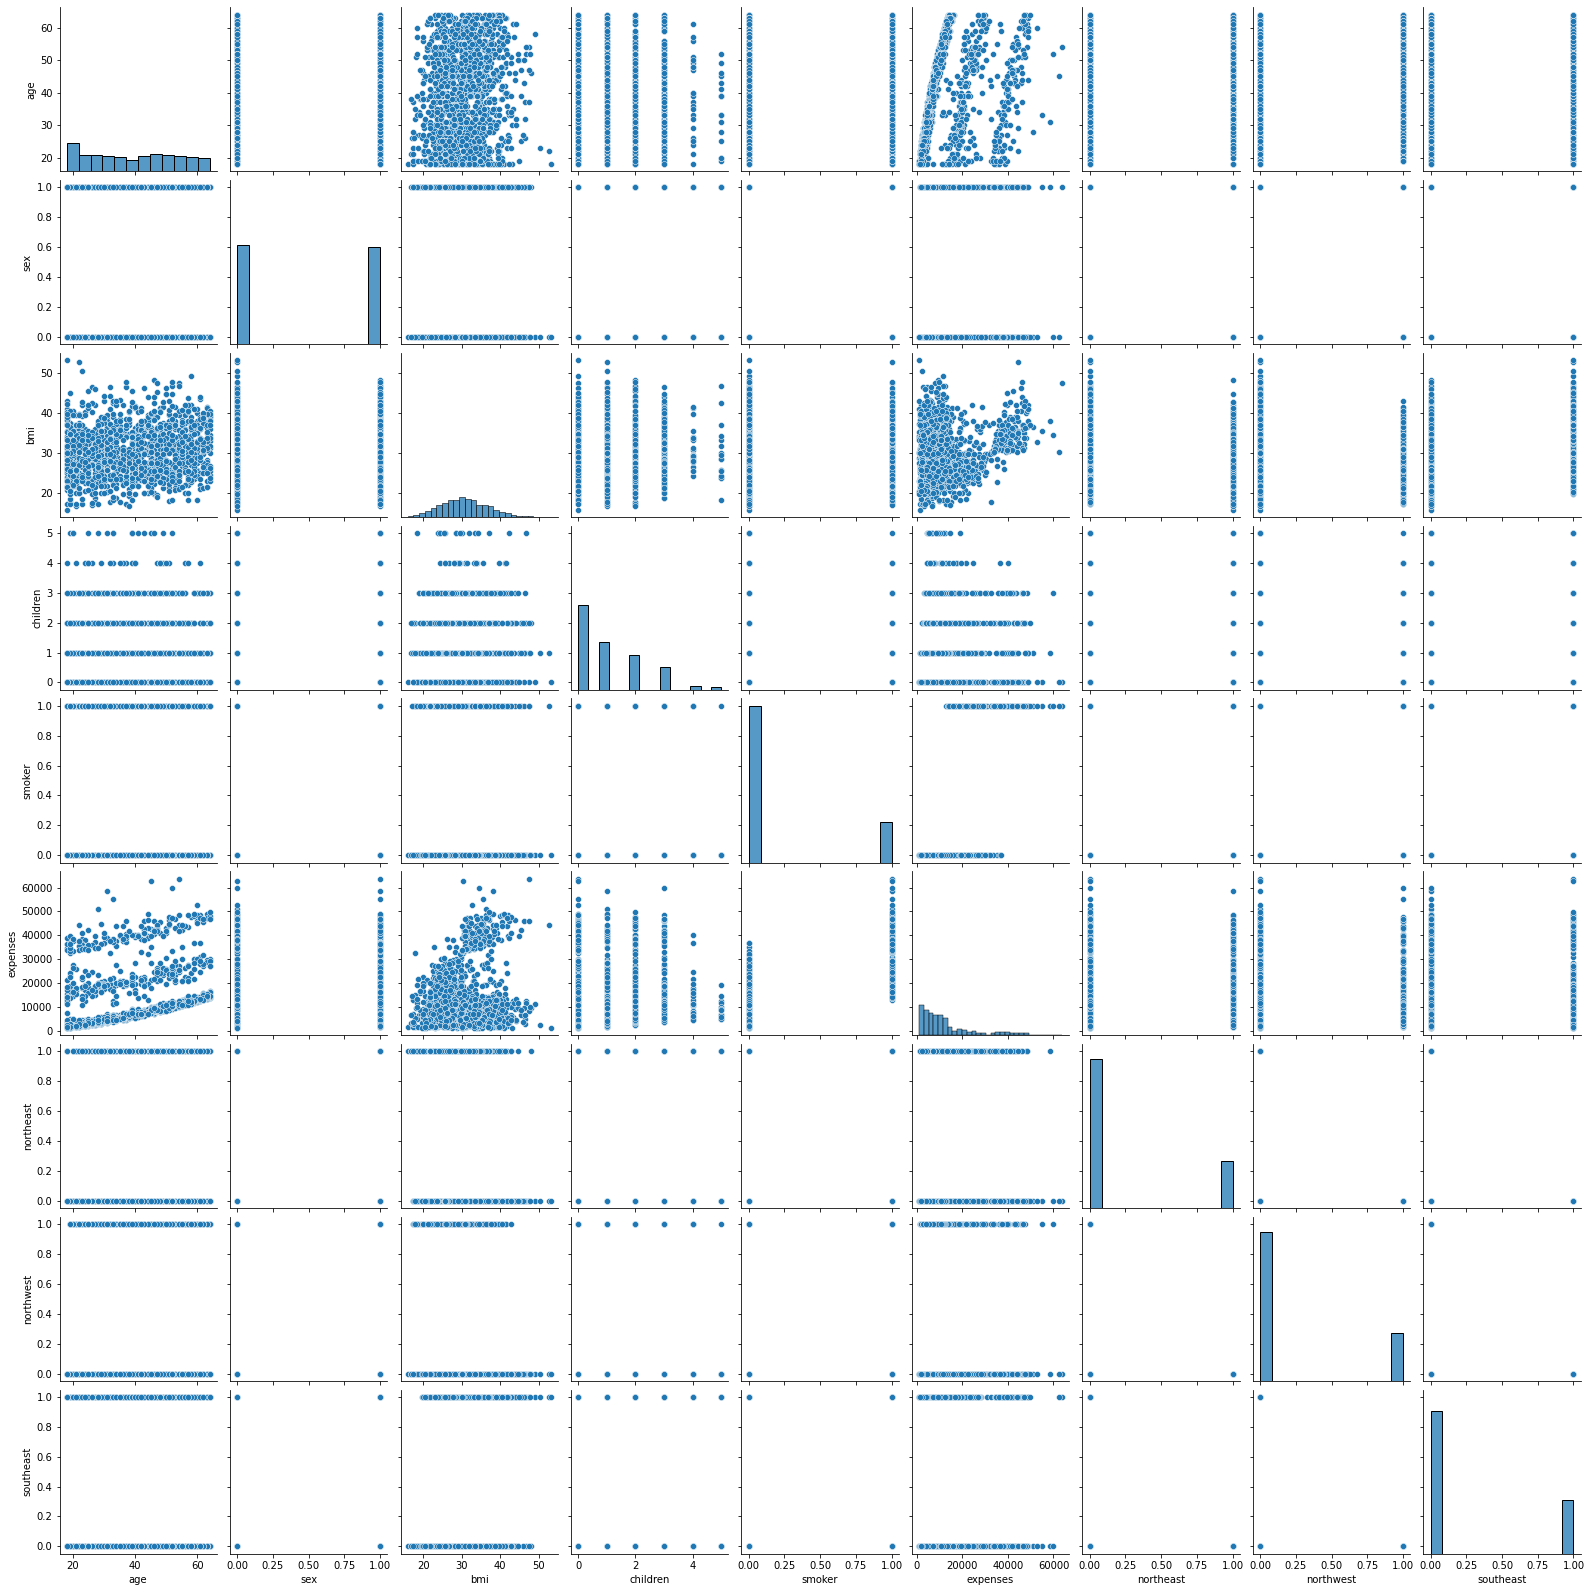

In [ ]:
sb.pairplot(data)

# Correlation

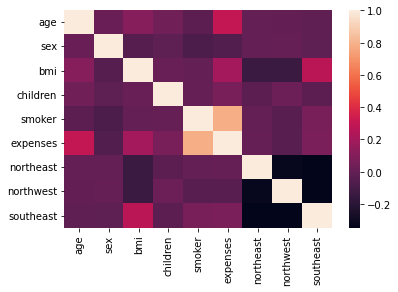

In [ ]:
sb.heatmap(data.corr())

## spearman

In [ ]:
corr,p_val=spearmanr(data)

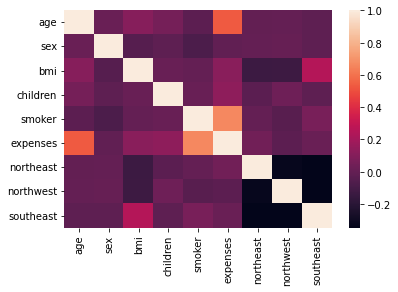

In [ ]:
sb.heatmap(corr,xticklabels=[i for i in data.columns],yticklabels=[i for i in data.columns])

### a small guess

In [ ]:
A=np.array(data.bmi)
A=(A-A.mean())/np.sqrt(A.var())

In [ ]:
b=np.linspace(-3,3,1000)
C=stats.norm.pdf(b, 0, 1)
# B=np.array([np.exp(-i*i/2)/np.sqrt(2*np.pi) for i in b])

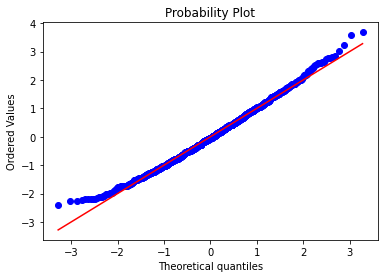

In [ ]:
stats.probplot(A, dist="norm", plot=pylab)
pylab.show()

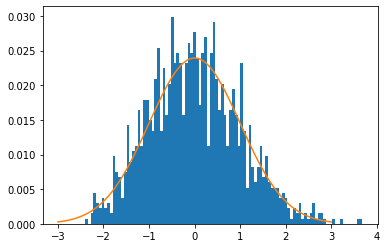

In [ ]:
plt.hist(A,bins=100 ,weights=np.ones_like(A)/A.size)
plt.plot(b,C*6/100)

### description

In [ ]:
data.describe()

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.665471,1.094918,0.204783,13270.422414,0.242152,0.242900,0.272048
std,14.049960,0.500160,6.098382,1.205493,0.403694,12110.011240,0.428546,0.428995,0.445181
min,18.000000,0.000000,16.000000,0.000000,0.000000,1121.870000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,4740.287500,0.000000,0.000000,0.000000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9382.030000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16639.915000,0.000000,0.000000,1.000000
max,64.000000,1.000000,53.100000,5.000000,1.000000,63770.430000,1.000000,1.000000,1.000000


## train /test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["expenses"],axis=1), data["expenses"]
                                                    , test_size=0.33, random_state=42)

## stat to predict by regression

In [ ]:
X=np.ones((X_train.shape[0],X_train.shape[1]+1))
X[:,:-1]=X_train
Y=y_train

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X[:,:-1],Y)

LinearRegression()

In [ ]:
reg.coef_

array([[-1.66036385e+27,  5.72018934e+26, -1.25875064e+27, ...,
         9.24137065e+25, -3.01903982e+26,  8.37368201e+25],
       [-1.66036385e+27,  5.72018934e+26, -1.25875064e+27, ...,
         9.24137065e+25, -3.01903982e+26,  8.37368201e+25],
       [-1.66036385e+27,  5.72018934e+26, -1.25875064e+27, ...,
         9.24137065e+25, -3.01903982e+26,  8.37368201e+25],
       ...,
       [-1.66036385e+27,  5.72018934e+26, -1.25875064e+27, ...,
         9.24137065e+25, -3.01903982e+26,  8.37368201e+25],
       [-1.66036385e+27,  5.72018934e+26, -1.25875064e+27, ...,
         9.24137065e+25, -3.01903982e+26,  8.37368201e+25],
       [-1.66036385e+27,  5.72018934e+26, -1.25875064e+27, ...,
         9.24137065e+25, -3.01903982e+26,  8.37368201e+25]])

In [ ]:
reg.intercept_

array([7.79822354e+29, 7.79822354e+29, 7.79822354e+29, 7.79822354e+29,
       7.79822354e+29, 7.79822354e+29, 7.79822354e+29, 7.79822354e+29,
       7.79822354e+29, 7.79822354e+29, 7.79822354e+29, 7.79822354e+29,
       7.79822354e+29, 7.79822354e+29, 7.79822354e+29, 7.79822354e+29,
       7.79822354e+29, 7.79822354e+29, 7.79822354e+29, 7.79822354e+29,
       7.79822354e+29, 7.79822354e+29, 7.79822354e+29, 7.79822354e+29,
       7.79822354e+29, 7.79822354e+29, 7.79822354e+29, 7.79822354e+29,
       7.79822354e+29, 7.79822354e+29, 7.79822354e+29, 7.79822354e+29,
       7.79822354e+29, 7.79822354e+29, 7.79822354e+29, 7.79822354e+29,
       7.79822354e+29, 7.79822354e+29, 7.79822354e+29, 7.79822354e+29,
       7.79822354e+29, 7.79822354e+29, 7.79822354e+29, 7.79822354e+29,
       7.79822354e+29, 7.79822354e+29, 7.79822354e+29, 7.79822354e+29,
       7.79822354e+29, 7.79822354e+29, 7.79822354e+29, 7.79822354e+29,
       7.79822354e+29, 7.79822354e+29, 7.79822354e+29, 7.79822354e+29,
      

In [ ]:
data

,age,sex,bmi,children,smoker,expenses,northeast,northwest,southeast
0,19,1,27.9,0,1,16884.92,0,0,0
1,18,0,33.8,1,0,1725.55,0,0,1
2,28,0,33.0,3,0,4449.46,0,0,1
3,33,0,22.7,0,0,21984.47,0,1,0
4,32,0,28.9,0,0,3866.86,0,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,0,31.0,3,0,10600.55,0,1,0
1334,18,1,31.9,0,0,2205.98,1,0,0
1335,18,1,36.9,0,0,1629.83,0,0,1
1336,21,1,25.8,0,0,2007.95,0,0,0


### plot for index v

In [ ]:
v=0

In [ ]:
X_range=np.array([[X[:,i].mean(),X[:,i].mean()] for i in range(len(data.columns))])
X_range[v,0]=X[:,v].min()
X_range[v,1]=X[:,v].max()
B=reg.predict(X_range[:-1].reshape((2,8))).reshape((2,1))

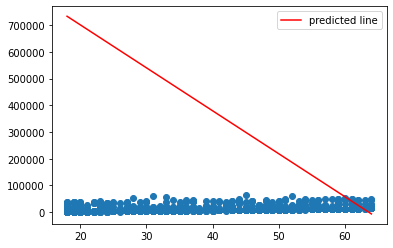

In [ ]:
plt.scatter(X[:,v],Y)
plt.plot(X_range[v,:],B,color='red',label="predicted line")
plt.legend()
plt.show()

Create gif

In [ ]:
def make_gif(name,frame_folder):
  images = []
  for filename in os.listdir(frame_folder):
    img = Image.open(os.path.join(frame_folder,filename))
    if img is not None:
      images.append(img)
  frame_one = images[0]
  name=name+".gif"
  frame_one.save(name, format="GIF", append_images=images,
               save_all=True, duration=10, loop=0)
    

In [ ]:
def maker(batch,batch_list):
  k=0
  for theta_val in batch_list:
    plt.scatter(X[:,0],Y) 
    Y_predict=X_range.T.dot(theta_val)
    plt.plot(X_range[0,:],Y_predict,color="red")
    plt.ylim(1000,64000)
    plt.savefig(batch+"/"+str(k)+".png")
    plt.close()
    k+=1
  dir="'"+batch+"'"
  make_gif(str(batch),batch)

# Gradient Descent

## batch gradient descent

In [ ]:
learning_rate = 0.1 
n_iterations = 1000
m = 100

In [ ]:
eta = 0.00001 # learning rate
n_iterations = 1000
m = 100
C=5

In [ ]:
X=np.ones((X_train.shape[0],X_train.shape[1]+1))
X[:,:-1]=X_train
Y=np.array(y_train).reshape((y_train.size,1))

In [ ]:
theta=np.random.random((9,1))
batch_list=[]

for iteration in range(n_iterations):
  gradients = C/m * X.T.dot(X.dot(theta)-Y)
  theta = theta - eta * gradients
  # here we try to check the error 
  batch_list.append(theta)

In [ ]:
maker('batch',batch_list)

In [ ]:
A_batch=(np.array(y_test)-np.array(X_test.dot(batch_list[-1][:-1])+batch_list[-1][-1]))
1-(A_batch*A_batch).mean()/(np.array(y_test)*np.array(y_test)).mean()

0.5042852632028554

## Stochastic Gradient Descent

In [ ]:
t0=5
T1=[0.01,0.1,1,10,100]
t2=50

In [ ]:
A={}
B={}
for t1 in T1:
  theta=np.random.random((9,1))
  stochastic_list=[]
  list_=[]

  for iteration in range(n_iterations):
    gradients = t0/(iteration*t1+t2) * X.T.dot(X.dot(theta)-Y)
    theta = theta - eta * gradients
    stochastic_list.append(theta)

  B[t1]=stochastic_list

In [ ]:
maker('stoch',B[1])

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, Y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
 sgd_reg.intercept_, sgd_reg.coef_

(array([-9.76417545e+10]),
 array([-1.61643745e+11, -7.70177024e+10, -2.84671448e+11, -2.13801011e+11,
         1.99641026e+11,  5.28130141e+11,  2.15410991e+11, -1.41092117e+10,
        -9.76417545e+10]))

In [ ]:
A_sgd=(np.array(y_test)-np.array(X_test.dot(stochastic_list[-1][:-1])+stochastic_list[-1][-1]))
1-(A_sgd*A_sgd).mean()/(np.array(y_test)*np.array(y_test)).mean()

0.5035669972414605

## Mini-batch gradient descent

In [ ]:
mini_batch_list = []

n_iterations = 1000
minibatch_size = 100
m=10

theta = np.random.randn(9,1) 
print("theta :" , theta)

t0, t1 = 2, 10000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X[shuffled_indices]
    y_shuffled = Y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 1/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        mini_batch_list.append(theta)

theta : [[-0.11598898]
 [-0.67669556]
 [-0.25944188]
 [ 0.5386037 ]
 [ 0.33308339]
 [ 0.64189773]
 [ 1.47290487]
 [-0.53835005]
 [-0.60336785]]


In [ ]:
A_mini=(np.array(y_test)-np.array(X_test.dot( mini_batch_list[-1][:-1])+ mini_batch_list[-1][-1]))
1-(A_mini*A_mini).mean()/(np.array(y_test)*np.array(y_test)).mean()

0.059375832672604156

In [ ]:
maker('minibatch',mini_batch_list)

## plot

In [ ]:
theta_batch = np.array(batch_list).reshape(len(batch_list),9)
theta_stochastic = np.array(B[10]).reshape(len(B[10]),9)
theta_path_mini_batch = np.array(mini_batch_list).reshape(len(mini_batch_list),9)

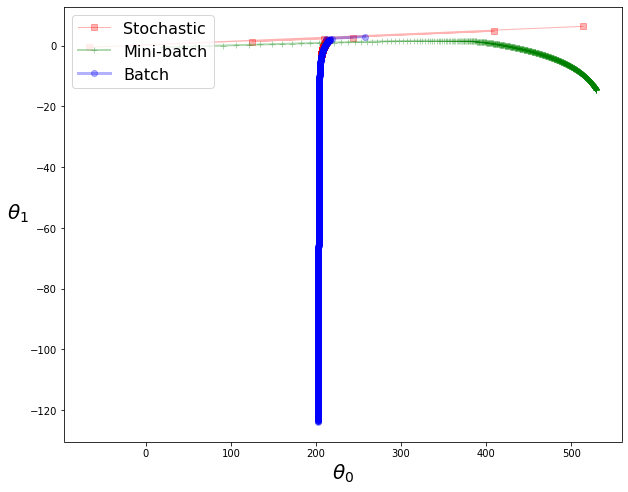

In [ ]:
plt.figure(figsize=(10,8))

plt.plot(theta_stochastic[:, 0], theta_stochastic[:, 1], "r-s", linewidth=1, label="Stochastic",alpha=0.3)
plt.plot(theta_path_mini_batch[:, 0], theta_path_mini_batch[:, 1], "g-+", linewidth=2, label="Mini-batch",alpha=0.3)
plt.plot(theta_batch[:, 0], theta_batch[:, 1], "b-o", linewidth=3, label="Batch",alpha=0.3)

# plt.scatter(Theta[0],Theta[1],color="black")

plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.show()

# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
m=100

k=3

theta=np.random.random(k+1)*10


In [ ]:
X=np.random.random((m,1))

def F(x,theta):
  t=1
  s=0
  for i in range (theta.shape[0]) :
    s+=theta[i]*t
    t*=x
  return s


Y=F(X,theta)+np.random.normal(0,1,(m,1))

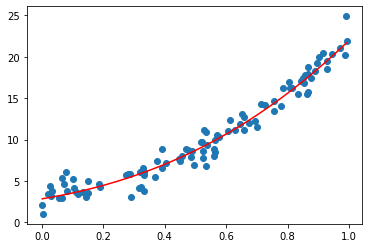

In [ ]:
X_range=np.array([i for i in np.arange(X.min(),X.max(),0.0001)])
X_range=X_range.reshape((len(X_range),1))
Y_range=F(X_range,theta)

plt.scatter(X,Y)
plt.plot(X_range,Y_range,color='red')

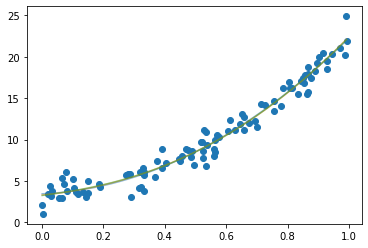

In [ ]:
A=[]
B=[]

plt.scatter(X,Y)

X_range=np.array([i for i in np.arange(X.min(),X.max(),0.0001)])
X_range=X_range.reshape((len(X_range),1))


for deg in range(2,5):
  reg=LinearRegression()
  poly_features = PolynomialFeatures(degree=deg, include_bias=False)
  X_poly = poly_features.fit_transform(X)
  reg.fit(X_poly,Y)

  # Y_predict=reg.predict(X_poly)

  # # error
  # A.append(((Y-Y_predict)*(Y-Y_predict)).sum())

  # # draw line
  # z=[reg.intercept_[0]]
  # for a in (reg.coef_) :
  #   z.append(a)
  # z=np.array(z)

  A=reg.predict(poly_features.fit_transform(X_range))
  

  plt.plot(X_range,A,alpha=0.5)

  # print(F(X_range,z))

In [ ]:
# error
# plt.plot([i for i in range(2,5)],A)

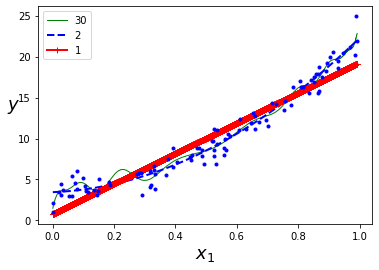

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 30), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),])
    
    polynomial_regression.fit(X, Y)
    y_newbig = polynomial_regression.predict(X_range)
    plt.plot(X_range, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, Y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

#Learning Curves

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)    

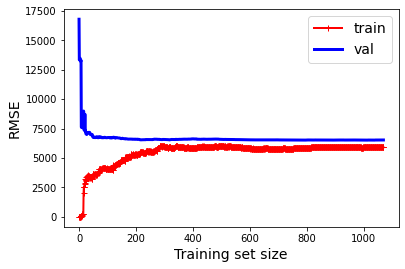

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,data.drop(["expenses"],axis=1), data["expenses"])                        
plt.show()   

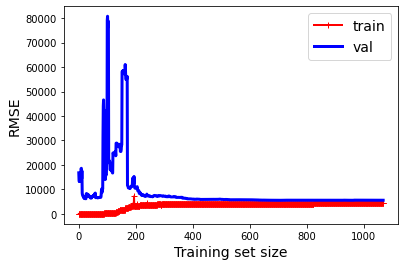

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, data.drop(["expenses"],axis=1), data["expenses"])
plt.show()  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["expenses"],axis=1), data["expenses"]
                                                    , test_size=0.33, random_state=42)

# Regularized Linear Models

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
# cholesky
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test,y_test)

0.7604044751905377

In [ ]:
#  Stochastic Average Gradient
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test,y_test)

0.7602264570571116

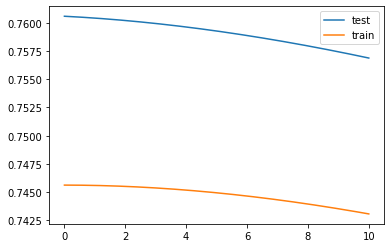

In [ ]:
Ridge_value=np.linspace(0,10,1000)
A=[]
B=[]
for val in Ridge_value:
  ridge_reg = Ridge(alpha=val, random_state=42)
  ridge_reg.fit(X_train, y_train)
  A.append(ridge_reg.score(X_test,y_test))
  B.append(ridge_reg.score(X_train, y_train))
  
plt.plot(Ridge_value,A,label="test")
plt.plot(Ridge_value,B,label="train")
plt.legend()
plt.show()

In [ ]:
# from sklearn.linear_model import Ridge

# def plot_model(model_class, polynomial, alphas, **model_kargs):
#     for alpha, style in zip(alphas, ("b-", "g--", "r:")):
#         model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
#         if polynomial:
#             model = Pipeline([
#                     ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
#                     ("std_scaler", StandardScaler()),
#                     ("regul_reg", model),
#                 ])
#         model.fit(X_train, y_train)
#         y_new_regul = model.predict(X_test)
#         lw = 2 if alpha > 0 else 1
#         plt.plot(X_test, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
#     plt.plot(X, Y, "b.", linewidth=3)
#     plt.legend(loc="upper left", fontsize=15)
#     plt.xlabel("$x_1$", fontsize=18)

# plt.figure(figsize=(8,4))
# plt.subplot(121)
# plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
# plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.subplot(122)
# plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

# plt.show()

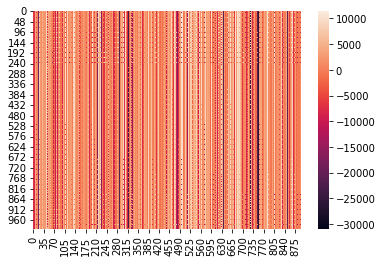

In [ ]:
Ridge_value=np.linspace(0,10,1000)
A=[]
for val in Ridge_value:
  ridge_reg = Ridge(alpha=val, random_state=42)
  ridge_reg.fit(X_train, y_train)
  A.append(ridge_reg.predict(X_train)-y_train)
A=np.array(A)
sb.heatmap(A)

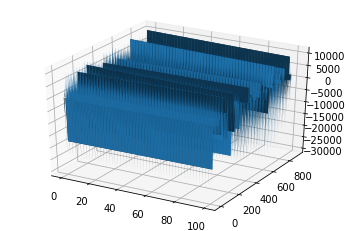

In [ ]:
x = np.linspace(0, 100, 1000)
y = np.linspace(0, 896, 896)

X, Y = np.meshgrid(x, y)

fig=plt.figure()
ax=plt.axes(projection='3d')

ax.plot_surface(X,Y,A.T)

## Lasso Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["expenses"],axis=1), data["expenses"]
                                                    , test_size=0.33, random_state=42)

In [ ]:
from sklearn.linear_model import Lasso

# plt.figure(figsize=(8,4))
# plt.subplot(121)
# plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
# plt.ylabel("$y$", rotation=0, fontsize=18)
# plt.subplot(122)
# plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

# plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.670e+10, tolerance: 1.313e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

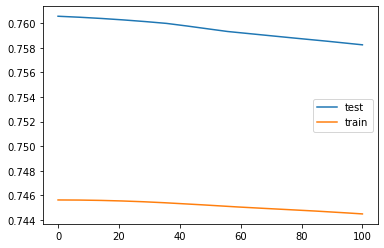

In [ ]:
Lasso_value=np.linspace(0,100,1000)
A=[]
B=[]
for val in Lasso_value:
  lasso_reg = Lasso(alpha=val, random_state=42)
  lasso_reg.fit(X_train, y_train)
  A.append(lasso_reg.score(X_test,y_test))
  B.append(lasso_reg.score(X_train, y_train))
  
plt.plot(Lasso_value,A,label="test")
plt.plot(Lasso_value,B,label="train")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.670e+10, tolerance: 1.313e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

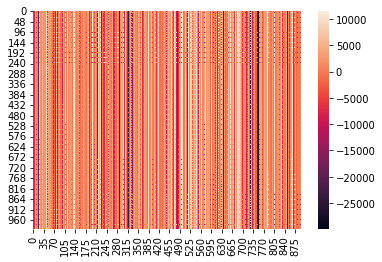

In [ ]:
Lasso_value=np.linspace(0,100,1000)
A=[]
for val in Lasso_value:
  lasso_reg = Lasso(alpha=val, random_state=42)
  lasso_reg.fit(X_train, y_train)
  A.append(lasso_reg.predict(X_train)-y_train)
A=np.array(A)
sb.heatmap(A)

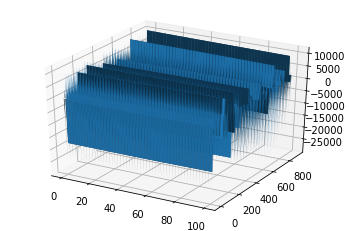

In [ ]:
x = np.linspace(0, 100, 1000)
y = np.linspace(0, 896, 896)

X, Y = np.meshgrid(x, y)

fig=plt.figure()
ax=plt.axes(projection='3d')

ax.plot_surface(X,Y,A.T)

## Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, Y)
elastic_net.predict([[1.5]])

array([21.46282243])

In [ ]:
Lasso_value=np.linspace(0,1,100)
Ridge_value=np.linspace(0,10,100)

A=np.zeros((100,100))
s=0
for L in Lasso_value:
  t=0
  for R in Ridge_value:
    elastic_net = ElasticNet(alpha=R, l1_ratio=L, random_state=42)
    elastic_net.fit(X_train, y_train)
    A[s,t]=elastic_net.score(X_test,y_test)
    t+=1
  s+=1
    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.670e+10, tolerance: 1.313e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, 

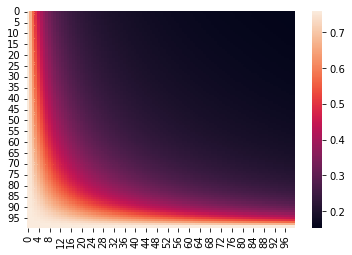

In [ ]:
sb.heatmap(A)

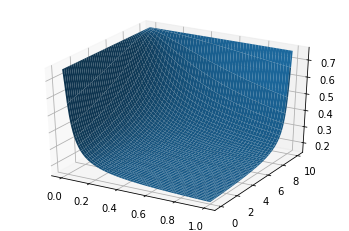

In [ ]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 10, 100)

X, Y = np.meshgrid(x, y)

fig=plt.figure()
ax=plt.axes(projection='3d')

ax.plot_surface(X,Y,A)

## Early Stopping

In [ ]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [ ]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

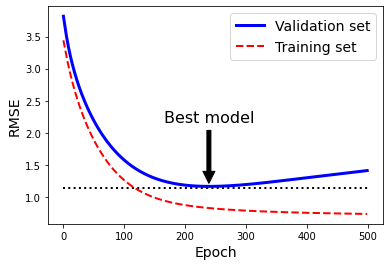

In [ ]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

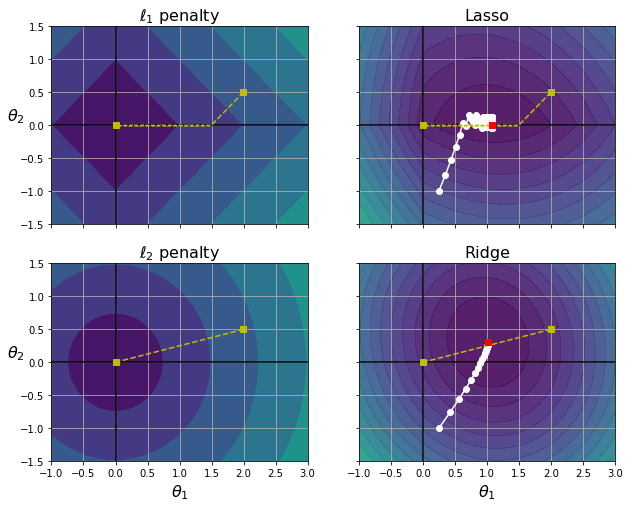

In [ ]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

plt.show()